In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [77]:

data=pd.read_csv("XYZ_Training Part.csv")

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,target
713,64,F,NAP,140,313,0,Normal,133,N,0.2,Up,0
714,50,F,ATA,120,244,0,Normal,162,N,1.1,Up,0
715,44,F,NAP,108,141,0,Normal,175,N,0.6,Flat,0
716,67,M,ASY,120,237,0,Normal,71,N,1.0,Flat,1
717,49,F,ASY,130,269,0,Normal,163,N,0.0,Up,0


In [81]:
data.describe()

,X1,X4,X5,X6,X8,X10,target
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,53.303621,132.344011,185.373259,0.256267,132.905292,0.823677,0.575209
std,9.562378,18.628574,117.650275,0.436876,24.931805,1.017502,0.494656
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,126.000000,0.000000,116.000000,0.000000,0.000000
50%,54.000000,130.000000,216.000000,0.000000,130.500000,0.400000,1.000000
75%,60.000000,140.000000,263.000000,1.000000,150.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,190.000000,5.000000,1.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      718 non-null    int64  
 1   X2      718 non-null    object 
 2   X3      718 non-null    object 
 3   X4      718 non-null    int64  
 4   X5      718 non-null    int64  
 5   X6      718 non-null    int64  
 6   X7      718 non-null    object 
 7   X8      718 non-null    int64  
 8   X9      718 non-null    object 
 9   X10     718 non-null    float64
 10  X11     718 non-null    object 
 11  target  718 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 67.4+ KB


In [83]:
data.isnull().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
target    0
dtype: int64

In [84]:
data_dup = data.duplicated().any()
print(data_dup)

False


In [85]:
data = data.drop_duplicates()

In [86]:
data.shape

(718, 12)

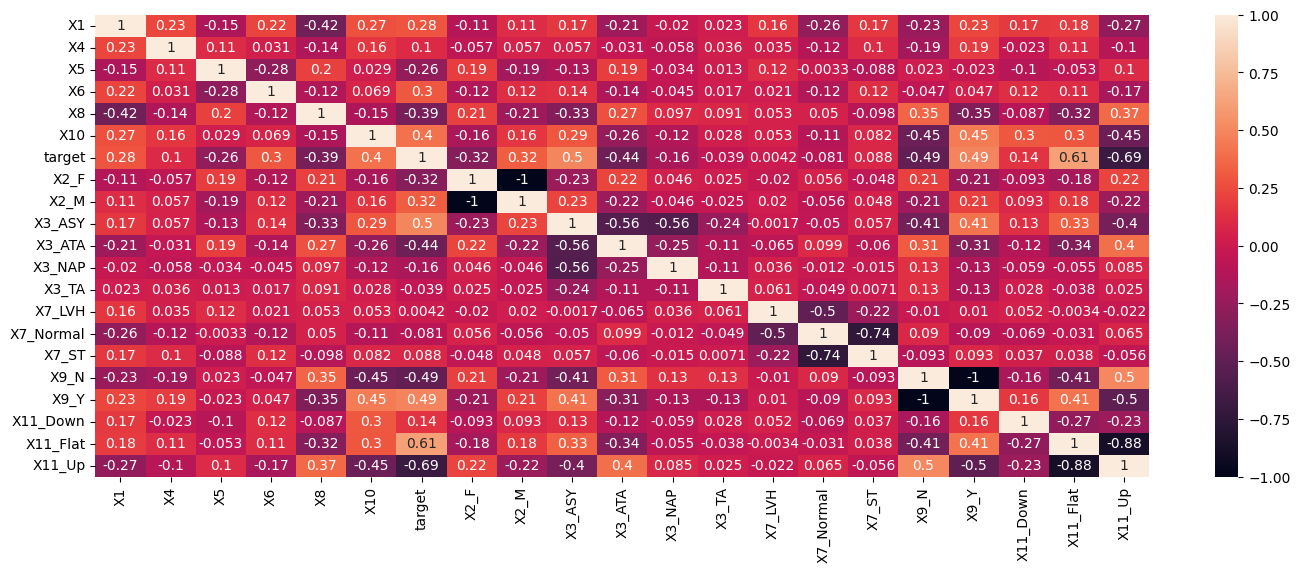

In [87]:
# قم بتحويل البيانات النصية إلى أعمدة بيانات منطقية
data_encoded = pd.get_dummies(data)



# قم بحساب معامل الارتباط مع البيانات المشفرة
plt.figure(figsize=(17,6))
f = sns.heatmap(data_encoded.corr(), annot=True)

In [88]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'target'],
      dtype='object')

In [89]:
data['target'].value_counts()

target
1    413
0    305
Name: count, dtype: int64

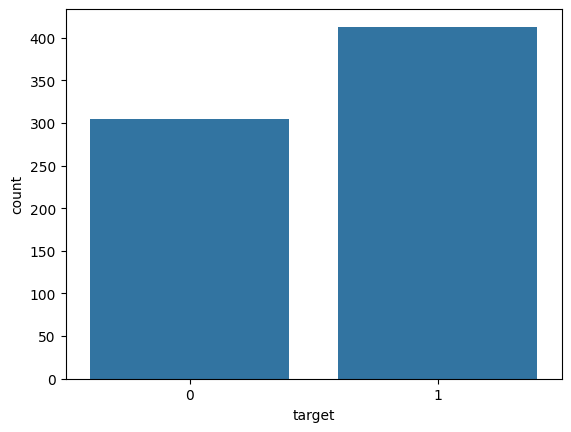

In [90]:
f= sns.countplot (data=data , x='target')

In [91]:
# قم بتحويل البيانات النصية إلى أعمدة بيانات منطقية
data_encoded = pd.get_dummies(data)

# قم بعرض البيانات المشفرة للتحقق من النتائج
print(data_encoded.head())

   X1   X4   X5  X6   X8  X10  target   X2_F   X2_M  X3_ASY  ...  X3_NAP  \
0  40  140  289   0  172  0.0       0  False   True   False  ...   False   
1  49  160  180   0  156  1.0       1   True  False   False  ...    True   
2  37  130  283   0   98  0.0       0  False   True   False  ...   False   
3  48  138  214   0  108  1.5       1   True  False    True  ...   False   
4  54  150  195   0  122  0.0       0  False   True   False  ...    True   

   X3_TA  X7_LVH  X7_Normal  X7_ST   X9_N   X9_Y  X11_Down  X11_Flat  X11_Up  
0  False   False       True  False   True  False     False     False    True  
1  False   False       True  False   True  False     False      True   False  
2  False   False      False   True   True  False     False     False    True  
3  False   False       True  False  False   True     False      True   False  
4  False   False       True  False   True  False     False     False    True  

[5 rows x 21 columns]


In [92]:
# قراءة ملف CSV وتحميل البيانات إلى DataFrame
data = pd.read_csv('XYZ_Training Part.csv')

# تحديد عتبة القيم الشاذة
outlier_threshold = 3

# حلقة لتحليل كل عمود وتحديد القيم الشاذة فيه
for column_name in data.columns:
    if data[column_name].dtype in ['int64', 'float64']:  # التأكد من أن العمود يحتوي على أرقام
        # حساب Z-scores للعمود المحدد
        z_scores = stats.zscore(data[column_name])

        # تحديد القيم الشاذة في العمود
        outliers = data[np.abs(z_scores) > outlier_threshold]

        # طباعة اسم العمود إذا كان يحتوي على قيم شاذة
        if not outliers.empty:
            print(f"Column '{column_name}' contains outliers.")

Column 'X4' contains outliers.
Column 'X5' contains outliers.
Column 'X10' contains outliers.


In [93]:
# قراءة ملف البيانات
data = pd.read_csv("XYZ_Training Part.csv")

# تحويل جميع القيم إلى أرقام
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# حساب المتوسط العددي لكل عمود بعد تحويل البيانات
column_means = data_numeric.mean()

# تعويض القيم المفقودة بالمتوسط العددي لكل عمود
data_filled = data_numeric.fillna(column_means)

# عرض البيانات بعد التعويض
print(data_filled.head())

   X1  X2  X3   X4   X5  X6  X7   X8  X9  X10  X11  target
0  40 NaN NaN  140  289   0 NaN  172 NaN  0.0  NaN       0
1  49 NaN NaN  160  180   0 NaN  156 NaN  1.0  NaN       1
2  37 NaN NaN  130  283   0 NaN   98 NaN  0.0  NaN       0
3  48 NaN NaN  138  214   0 NaN  108 NaN  1.5  NaN       1
4  54 NaN NaN  150  195   0 NaN  122 NaN  0.0  NaN       0


In [94]:
# قائمة بأسماء الأعمدة النصية
text_columns = ['X2', 'X3', 'X7', 'X9', 'X11']

# حلقة لتحويل الأعمدة النصية إلى أعمدة رقمية باستخدام ترميز الفئة
label_encoders = {}
for col in text_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# بعد ذلك، قم بملء القيم المفقودة باستخدام متوسط العمود
data.fillna(data.mean(), inplace=True)

# طباعة البيانات بعد ملء القيم المفقودة
print(data.head())


   X1  X2  X3   X4   X5  X6  X7   X8  X9  X10  X11  target
0  40   1   1  140  289   0   1  172   0  0.0    2       0
1  49   0   2  160  180   0   1  156   0  1.0    1       1
2  37   1   1  130  283   0   2   98   0  0.0    2       0
3  48   0   0  138  214   0   1  108   1  1.5    1       1
4  54   1   2  150  195   0   1  122   0  0.0    2       0


In [95]:
# قراءة البيانات من ملف CSV
data = pd.read_csv("XYZ_Training Part.csv")

# استخراج الملامح باستخدام تحويل النصوص إلى متغيرات فئوية
# افتراض أن لديك عمود يحتوي على بيانات نصية تريد تحويلها إلى متغيرات فئوية
# على سبيل المثال، إذا كانت لديك عمود يحتوي على أنواع مختلفة من السيارات، يمكنك تحويلها إلى متغيرات فئوية
data = pd.get_dummies(data, columns=['X11'])

# يمكنك استخدام أي تقنيات أخرى لاستخراج المزيد من المعلومات حسب طبيعة البيانات
# على سبيل المثال، يمكنك استخدام PCA لتقليل الأبعاد واستخراج الملامح الهامة

# طباعة البيانات بعد استخراج الملامح
print(data.head())


   X1 X2   X3   X4   X5  X6      X7   X8 X9  X10  target  X11_Down  X11_Flat  \
0  40  M  ATA  140  289   0  Normal  172  N  0.0       0     False     False   
1  49  F  NAP  160  180   0  Normal  156  N  1.0       1     False      True   
2  37  M  ATA  130  283   0      ST   98  N  0.0       0     False     False   
3  48  F  ASY  138  214   0  Normal  108  Y  1.5       1     False      True   
4  54  M  NAP  150  195   0  Normal  122  N  0.0       0     False     False   

   X11_Up  
0    True  
1   False  
2    True  
3   False  
4    True  


In [96]:
print(data.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'target',
       'X11_Down', 'X11_Flat', 'X11_Up'],
      dtype='object')


In [97]:
# قراءة البيانات من ملف CSV
data = pd.read_csv("XYZ_Training Part.csv")

# Encoding categorical variables
label_encoder = LabelEncoder()
data['encoded_column'] = label_encoder.fit_transform(data['X2'])

# Scaling features
scaler = MinMaxScaler()  # يمكنك استخدام StandardScaler() بدلاً من MinMaxScaler() إذا كنت تفضل ذلك
data_scaled = scaler.fit_transform(data[['X10', 'X1']])

# طباعة البيانات بعد الترميز والتحجيم
print(data.head())

   X1 X2   X3   X4   X5  X6      X7   X8 X9  X10   X11  target  encoded_column
0  40  M  ATA  140  289   0  Normal  172  N  0.0    Up       0               1
1  49  F  NAP  160  180   0  Normal  156  N  1.0  Flat       1               0
2  37  M  ATA  130  283   0      ST   98  N  0.0    Up       0               1
3  48  F  ASY  138  214   0  Normal  108  Y  1.5  Flat       1               0
4  54  M  NAP  150  195   0  Normal  122  N  0.0    Up       0               1


In [98]:
# قراءة ملف البيانات
data = pd.read_csv("XYZ_Training Part.csv")

# تحديد المتغيرات الرقمية
numeric_columns = ['X1', 'X4' , 'X5', 'X8' , 'X10']  # استبدل بأسماء الأعمدة الفعلية

# تحويل المتغيرات الرقمية باستخدام StandardScaler
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# حفظ البيانات المحدثة إلى ملف CSV إذا لزم الأمر
data.to_csv("XYZ_Training_Processed.csv", index=False)
print(data.head())

         X1 X2   X3        X4        X5  X6      X7        X8 X9       X10  \
0 -1.392216  M  ATA  0.411267  0.881417   0  Normal  1.569159  N -0.810073   
1 -0.450371  F  NAP  1.485635 -0.045703   0  Normal  0.926961  N  0.173411   
2 -1.706164  M  ATA -0.125917  0.830383   0      ST -1.401007  N -0.810073   
3 -0.555021  F  ASY  0.303831  0.243490   0  Normal -0.999633  Y  0.665153   
4  0.072876  M  NAP  0.948451  0.081882   0  Normal -0.437710  N -0.810073   

    X11  target  
0    Up       0  
1  Flat       1  
2    Up       0  
3  Flat       1  
4    Up       0  


train_accuracy: 0.8954703832752613
test_accuracy: 0.8611111111111112
Confusion Matrix:
[[45  7]
 [13 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.92      0.86      0.89        92

    accuracy                           0.86       144
   macro avg       0.85      0.86      0.85       144
weighted avg       0.87      0.86      0.86       144



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


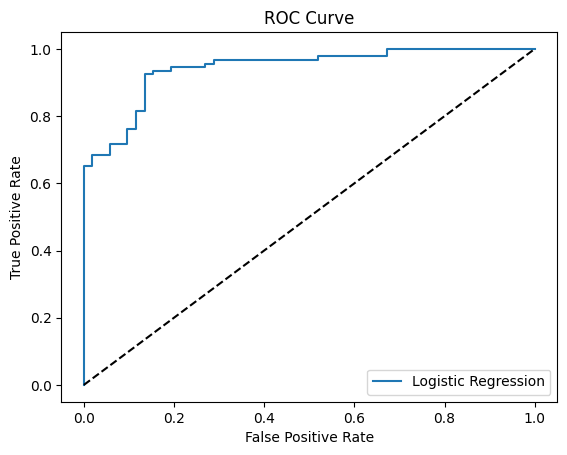

In [99]:
# Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Preprocessing: Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(data.drop(columns=["target"]))  # Apply One-Hot Encoding
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, y_train)

# Predict the test set labels
y_pred1 = log.predict(X_test)

from sklearn.metrics import accuracy_score

# تنبؤ الفئة باستخدام البيانات الاختبار
y_pred1 = log.predict(X_train)

# حساب الدقة باستخدام بيانات الاختبار
accuracy = accuracy_score(y_train, y_pred1)
print("train_accuracy:", accuracy)

# تنبؤ الفئة باستخدام البيانات التدريب
y_pred1 = log.predict(X_test)

# حساب الدقة باستخدام بيانات التدريب
accuracy = accuracy_score(y_test, y_pred1)
print("test_accuracy:", accuracy)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred1)
print("Classification Report:")
print(class_report)

# Generate AUC-ROC curve
y_proba = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Test accuracy: 0.8333333333333334
Train accuracy: 0.8954703832752613
Confusion Matrix:
[[41 11]
 [13 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        52
           1       0.88      0.86      0.87        92

    accuracy                           0.83       144
   macro avg       0.82      0.82      0.82       144
weighted avg       0.83      0.83      0.83       144



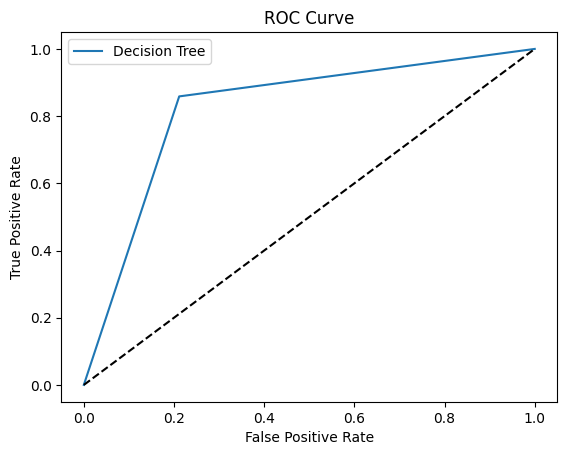

In [100]:
# Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Preprocessing: Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(data.drop(columns=["target"]))  # Apply One-Hot Encoding
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred2 = dt.predict(X_test)

# حساب الدقة باستخدام بيانات التدريب
accuracy= accuracy_score(y_test, y_pred2)
print("Test accuracy:", accuracy)

from sklearn.metrics import accuracy_score

# تنبؤ الفئة باستخدام البيانات التدريب
y_pred_train = log.predict(X_train)

# حساب الدقة باستخدام بيانات التدريب
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy_train)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred2)
print("Classification Report:")
print(class_report)

# Generate AUC-ROC curve
y_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Test accuracy: 0.8680555555555556
Train accuracy: 0.8954703832752613
Confusion Matrix:
[[47  5]
 [14 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        52
           1       0.94      0.85      0.89        92

    accuracy                           0.87       144
   macro avg       0.86      0.88      0.86       144
weighted avg       0.88      0.87      0.87       144



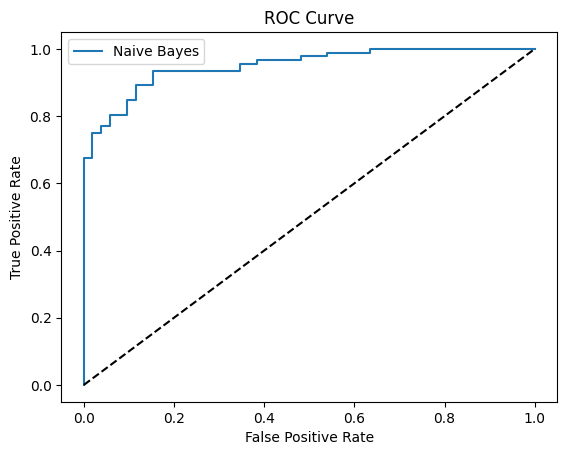

In [101]:

# Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Preprocessing: Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(data.drop(columns=["target"]))  # Apply One-Hot Encoding
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
gn = GaussianNB()
gn.fit(X_train, y_train)

# Predict the test set labels
y_pred3 = gn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Test accuracy:", accuracy)

from sklearn.metrics import accuracy_score

# تنبؤ الفئة باستخدام البيانات التدريب
y_pred_train = log.predict(X_train)

# حساب الدقة باستخدام بيانات التدريب
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy_train)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred3)
print("Classification Report:")
print(class_report)

# Generate AUC-ROC curve
y_proba = gn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Test accuracy: 0.9166666666666666
Train accuracy: 0.8954703832752613
Confusion Matrix:
[[47  5]
 [ 7 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.94      0.92      0.93        92

    accuracy                           0.92       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.92      0.92      0.92       144



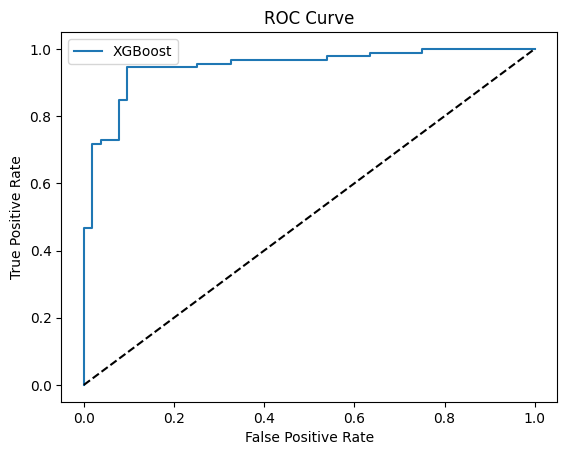

In [102]:
#Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Preprocessing: Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(data.drop(columns=["target"]))  # Apply One-Hot Encoding
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xg = XGBClassifier()
xg.fit(X_train, y_train)

# Predict the test set labels
y_pred4 = xg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred4)
print("Test accuracy:", accuracy)

from sklearn.metrics import accuracy_score

# تنبؤ الفئة باستخدام البيانات التدريب
y_pred_train = log.predict(X_train)

# حساب الدقة باستخدام بيانات التدريب
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy_train)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred4)
print("Classification Report:")
print(class_report)

# Generate AUC-ROC curve
y_proba = xg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Test accuracy: 0.7569444444444444
Train accuracy: 0.8954703832752613
Confusion Matrix:
[[42 10]
 [25 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        52
           1       0.87      0.73      0.79        92

    accuracy                           0.76       144
   macro avg       0.75      0.77      0.75       144
weighted avg       0.78      0.76      0.76       144



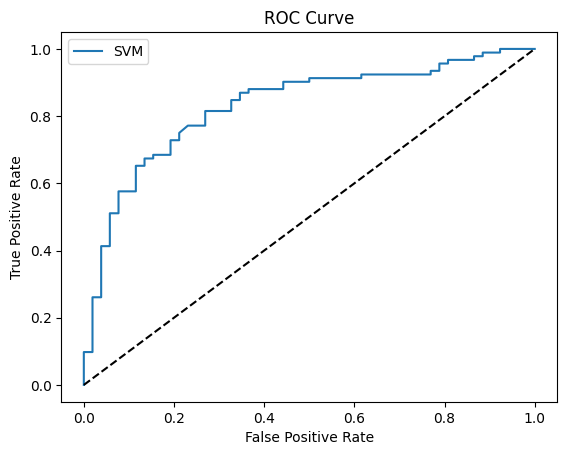

In [103]:
# Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Preprocessing: Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(data.drop(columns=["target"]))  # Apply One-Hot Encoding
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svc = SVC(probability=True)  # Set probability to True for ROC curve
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred5 = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred5)
print("Test accuracy:", accuracy)

from sklearn.metrics import accuracy_score

# تنبؤ الفئة باستخدام البيانات التدريب
y_pred_train = log.predict(X_train)

# حساب الدقة باستخدام بيانات التدريب
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train accuracy:", accuracy_train)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred5)
print("Classification Report:")
print(class_report)

# Generate AUC-ROC curve
y_proba = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='SVM')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [104]:
final_data = pd.DataFrame({'MODELS':['log' , 'dt' , 'gn' , 'xg' ,'svc'] ,
                           'ACC':[accuracy_score(y_test, y_pred1),
                                  accuracy_score(y_test, y_pred2),
                                accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                   accuracy_score(y_test, y_pred5)]})

In [105]:
final_data

,MODELS,ACC
0,log,0.861111
1,dt,0.833333
2,gn,0.868056
3,xg,0.916667
4,svc,0.756944


<Axes: xlabel='MODELS', ylabel='ACC'>

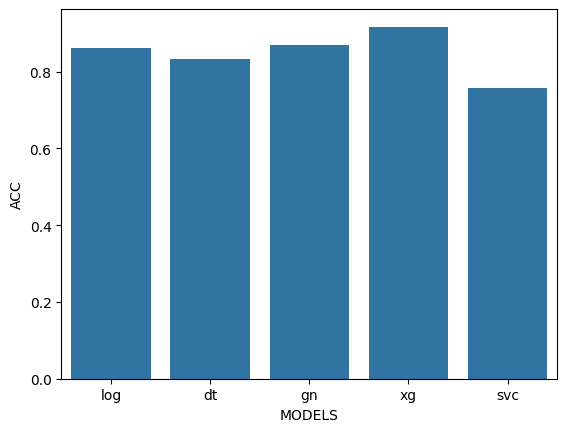

In [106]:
import seaborn as sns

sns.barplot(x=final_data['MODELS'], y=final_data['ACC'])


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=["target"])
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
56,31,M,ASY,120,270,0,Normal,153,Y,1.5,Flat
204,56,M,ATA,130,184,0,Normal,100,N,0.0,Up
319,68,M,ASY,145,0,1,Normal,136,N,1.8,Up
529,72,M,ASY,143,211,0,Normal,109,Y,1.4,Flat
24,40,M,NAP,130,215,0,Normal,138,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
71,44,M,ATA,130,215,0,Normal,135,N,0.0,Up
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up


In [109]:
y_test

120    1
331    1
39     0
637    0
514    1
      ..
132    1
292    0
41     1
108    0
264    1
Name: target, Length: 144, dtype: int64

In [110]:
# Load the dataset
data = pd.read_csv('XYZ_Training Part.csv')

# Preprocessing: Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(data.drop(columns=["target"]))  # Apply One-Hot Encoding
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.86086957 0.83478261 0.84347826 0.7826087  0.78070175]
Mean CV Accuracy: 0.8204881769641496


In [111]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = DecisionTreeClassifier()

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameters distributions
param_dist = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the model
model = DecisionTreeClassifier()

# Random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 11}


In [113]:
# تطبيق نفس العمليات الخاصة بالمعالجة المسبقة على بيانات الاختبار
#X_test_new = data_encoded.drop('target', axis=1)  # استبدال 'target_column' بالمتغير المستهدف

# التأكد من تطابق أسماء الميزات في بيانات الاختبار مع تلك في بيانات التدريب
#train_features = X_train.columns.tolist()
#test_features = X_test_new.columns.tolist()

# التأكد من أن جميع أسماء الميزات في بيانات الاختبار موجودة في بيانات التدريب
#for feature in test_features:
   # if feature not in train_features:
       # print(f"Feature '{feature}' is not found in training data.")

# التنبؤ باستخدام النموذج المحمل
#predictions_new = loaded_model.predict(X_test_new)

# طباعة التنبؤات
#print(predictions_new)


In [114]:


# 1. استيراد المكتبات المطلوبة

# 2. قراءة البيانات
#test_data = pd.read_csv('pp.csv')  # استبدل 'test_data.csv' بمسار ملف البيانات الخاص بك

# 3. معالجة البيانات
# قم بتطبيق نفس العمليات التي قمت بها أثناء معالجة بيانات التدريب هنا
# على سبيل المثال:
# - تحويل البيانات النصية إلى تمثيل رقمي (One-Hot Encoding)
# - تعبئة القيم الناقصة إذا كانت موجودة

# 4. حفظ البيانات المعالجة
#test_data.to_csv('processed_test_data.csv', index=False)  # استبدل 'processed_test_data.csv' بالاسم الذي تريده لملف البيانات المعالجة

# 5. انتهاء البرنامج
#print("Preprocessing completed successfully.")